<a href="https://colab.research.google.com/github/Ykomash/Projects/blob/main/Minimizing_churn_rate_through_analysis_of_financial_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("/churn_data.csv")
df = df[df["credit_score"] != 'Weekly']
df.head(5)

<ipython-input-94-5185fabe68c6>:1: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/churn_data.csv")


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409.0,0,37.0,na,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,Leo,1.0,0.0,NaN,0.00,0.0
1,23547.0,0,28.0,R,486.0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,Leo,0.0,0.0,44.0,1.47,1.0
2,58313.0,0,35.0,R,561.0,47,2,86,47,0,...,0.0,0.0,0.0,0.0,Capricorn,1.0,0.0,65.0,2.17,0.0
3,8095.0,0,26.0,R,567.0,26,3,38,25,0,...,0.0,0.0,0.0,0.0,Capricorn,0.0,0.0,33.0,1.10,1.0
4,61353.0,1,27.0,na,NaN,0,0,2,0,0,...,0.0,0.0,0.0,0.0,Aries,1.0,0.0,1.0,0.03,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42683 entries, 0 to 42682
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     42682 non-null  float64
 1   churn                    42683 non-null  int64  
 2   age                      42677 non-null  float64
 3   housing                  42683 non-null  object 
 4   credit_score             30027 non-null  object 
 5   deposits                 42683 non-null  int64  
 6   withdrawal               42683 non-null  int64  
 7   purchases_partners       42683 non-null  int64  
 8   purchases                42683 non-null  int64  
 9   cc_taken                 42683 non-null  object 
 10  cc_recommended           42683 non-null  int64  
 11  cc_disliked              42683 non-null  int64  
 12  cc_liked                 42683 non-null  float64
 13  cc_application_begin     42683 non-null  float64
 14  app_downloaded        

In [95]:

from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (34145, 30)
y_train shape: (34145,)
X_test shape: (8537, 30)
y_test shape: (8537,)


#Missing values

In [24]:
df.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [96]:
X_train['rewards_earned'] = X_train.apply(lambda x: 0 if x['reward_rate'] == 0 else x['rewards_earned'], axis=1)
X_test['rewards_earned'] = X_test.apply(lambda x: 0 if x['reward_rate'] == 0 else x['rewards_earned'], axis=1)

X_train['missing_CS'] = X_train['credit_score'].isnull().astype(int)
X_test['missing_CS'] = X_test['credit_score'].isnull().astype(int)

# Impute missing credit scores with the median
median_credit_score = X_train['credit_score'].median()
X_train['credit_score'].fillna(median_credit_score, inplace=True)
X_test['credit_score'].fillna(median_credit_score, inplace=True)

combined_data = pd.concat([X_train, y_train], axis=1)
combined_data.dropna(inplace =True)

combined2_data = pd.concat([X_test, y_test], axis=1)
combined2_data.dropna(inplace =True)

X_train = combined_data.drop('churn', axis=1)  # Assuming 'churn' is the target variable
y_train = combined_data['churn']

X_test = combined2_data.drop('churn', axis=1)  # Assuming 'churn' is the target variable
y_test = combined2_data['churn']

X_train['credit_score'] = X_train['credit_score'].astype(float)
X_test['credit_score'] = X_test['credit_score'].astype(float)

In [49]:
combined_data

,user,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,missing_CS,churn
22454,2133.0,26.0,R,515.0,0,0,0,0,1,183,...,0.0,0.0,Sagittarius,0.0,0.0,66.0,2.20,0.0,0,1
20971,45948.0,21.0,R,554.0,0,0,24,0,0,34,...,0.0,0.0,Scorpio,0.0,0.0,14.0,0.52,0.0,0,0
28326,67241.0,37.0,R,542.0,0,0,0,0,0,0,...,0.0,0.0,Pisces,0.0,0.0,77.0,2.57,0.0,1,1
13895,20436.0,22.0,na,452.0,0,0,7,0,0,13,...,0.0,0.0,Taurus,0.0,0.0,4.0,0.18,0.0,0,0
38763,5535.0,33.0,R,754.0,0,0,0,0,0,192,...,0.0,0.0,na,0.0,0.0,65.0,2.17,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32103,27733.0,32.0,R,589.0,15,0,88,15,0,264,...,0.0,0.0,Capricorn,0.0,0.0,58.0,1.93,1.0,0,0
30403,17900.0,19.0,R,455.0,1,0,0,1,0,134,...,0.0,0.0,Virgo,0.0,0.0,35.0,1.17,0.0,0,1
21243,14499.0,43.0,O,630.0,0,0,0,0,0,138,...,0.0,0.0,Taurus,0.0,0.0,39.0,1.30,0.0,0,1
42614,49822.0,17.0,R,542.0,2,0,50,2,0,154,...,0.0,0.0,Scorpio,0.0,0.0,42.0,1.40,1.0,1,1


In [50]:
X_train["missing_CS"].value_counts()

0    23968
1    10171
Name: missing_CS, dtype: int64

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34140 entries, 22454 to 2732
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     34140 non-null  float64
 1   age                      34140 non-null  float64
 2   housing                  34140 non-null  object 
 3   credit_score             34140 non-null  float64
 4   deposits                 34140 non-null  int64  
 5   withdrawal               34140 non-null  int64  
 6   purchases_partners       34140 non-null  int64  
 7   purchases                34140 non-null  int64  
 8   cc_taken                 34140 non-null  object 
 9   cc_recommended           34140 non-null  int64  
 10  cc_disliked              34140 non-null  int64  
 11  cc_liked                 34140 non-null  float64
 12  cc_application_begin     34140 non-null  float64
 13  app_downloaded           34140 non-null  int64  
 14  web_user           

In [25]:
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:
features = ['age', 'deposits']

import math

# Calculate the number of rows needed
num_rows = math.ceil(len(numerical_features) / 3)

# Set up subplots with multiple rows
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Create scatter plots for each feature
for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=feature, y='credit_score', data=X_train, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Credit Score')
    axes[i].set_title(f'Scatter Plot of {feature} with Credit Score')

# Remove any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


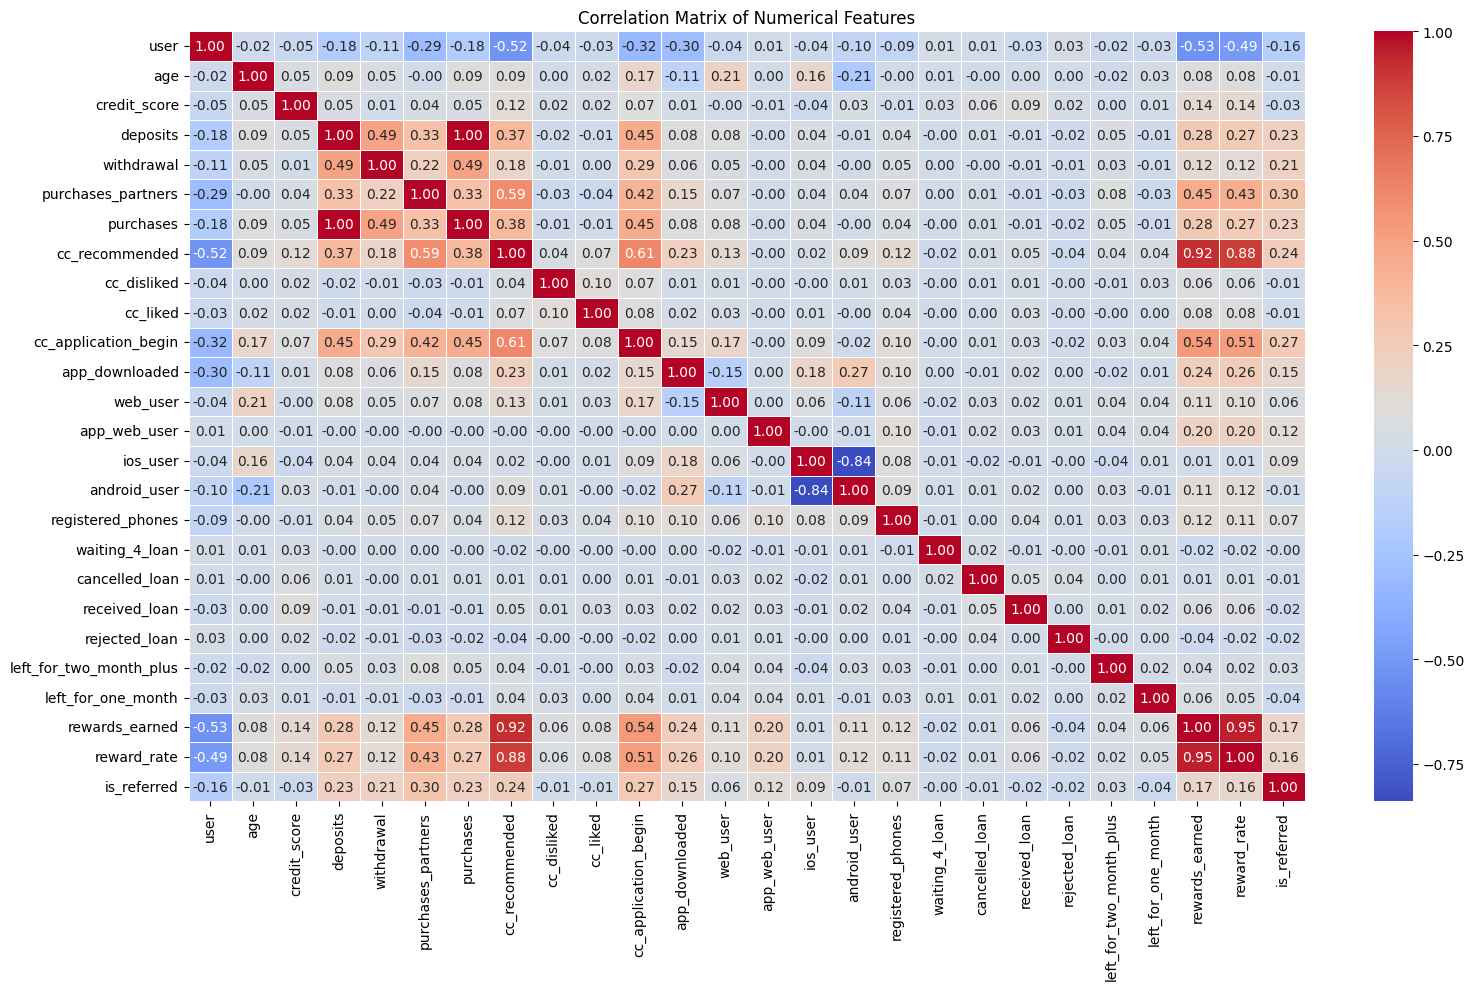

In [37]:
# Assuming X_train is your DataFrame with numerical features
X_train['credit_score'] = X_train['credit_score'].astype(float)

numerical_features = X_train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
categorical_features = X_train.select_dtypes(include='object')

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create box plots for each categorical feature
for i, feature in enumerate(categorical_features.columns):
    plt.subplot(2, 2, i + 1)  # Adjust the number of subplots based on the number of categorical features
    sns.boxplot(x=feature, y='credit_score', data=X_train)
    plt.title(f'Box Plot of {feature} with Credit Score')

plt.tight_layout()
plt.show()

#EDA


In [32]:
combined_data = pd.concat([X_train, y_train], axis=1)
combined_data.dropna(inplace =True)
combined_data

,user,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred,missing_CS,churn
22454,2133.0,26.0,R,515.0,0.0,0.0,0.0,0.0,1,183.0,...,0.0,0.0,Sagittarius,0.0,0.0,66.0,2.20,0.0,0.0,1
20971,45948.0,21.0,R,554.0,0.0,0.0,24.0,0.0,0,34.0,...,0.0,0.0,Scorpio,0.0,0.0,14.0,0.52,0.0,0.0,0
24844,15016.0,36.0,na,509.0,1.0,0.0,43.0,1.0,0,98.0,...,0.0,0.0,Libra,0.0,0.0,20.0,0.67,0.0,0.0,1
13895,20436.0,22.0,na,452.0,0.0,0.0,7.0,0.0,0,13.0,...,0.0,0.0,Taurus,0.0,0.0,4.0,0.18,0.0,0.0,0
25051,16348.0,32.0,R,521.0,1.0,0.0,45.0,1.0,0,98.0,...,0.0,0.0,Cancer,0.0,0.0,21.0,0.70,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32103,27733.0,32.0,R,589.0,15.0,0.0,88.0,15.0,0,264.0,...,0.0,0.0,Capricorn,0.0,0.0,58.0,1.93,1.0,0.0,0
30403,17900.0,19.0,R,455.0,1.0,0.0,0.0,1.0,0,134.0,...,0.0,0.0,Virgo,0.0,0.0,35.0,1.17,0.0,0.0,1
21243,14499.0,43.0,O,630.0,0.0,0.0,0.0,0.0,0,138.0,...,0.0,0.0,Taurus,0.0,0.0,39.0,1.30,0.0,0.0,1
42613,33457.0,37.0,R,487.0,56.0,1.0,62.0,56.0,0,293.0,...,0.0,0.0,Pisces,0.0,0.0,58.0,1.93,0.0,0.0,0


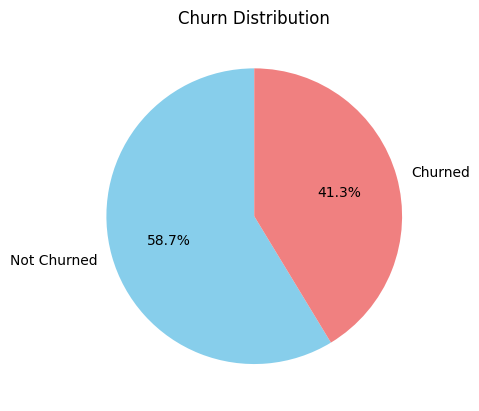

In [63]:
churn_counts = combined_data['churn'].value_counts()

# Create a pie plot
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Churn Distribution')
plt.show()

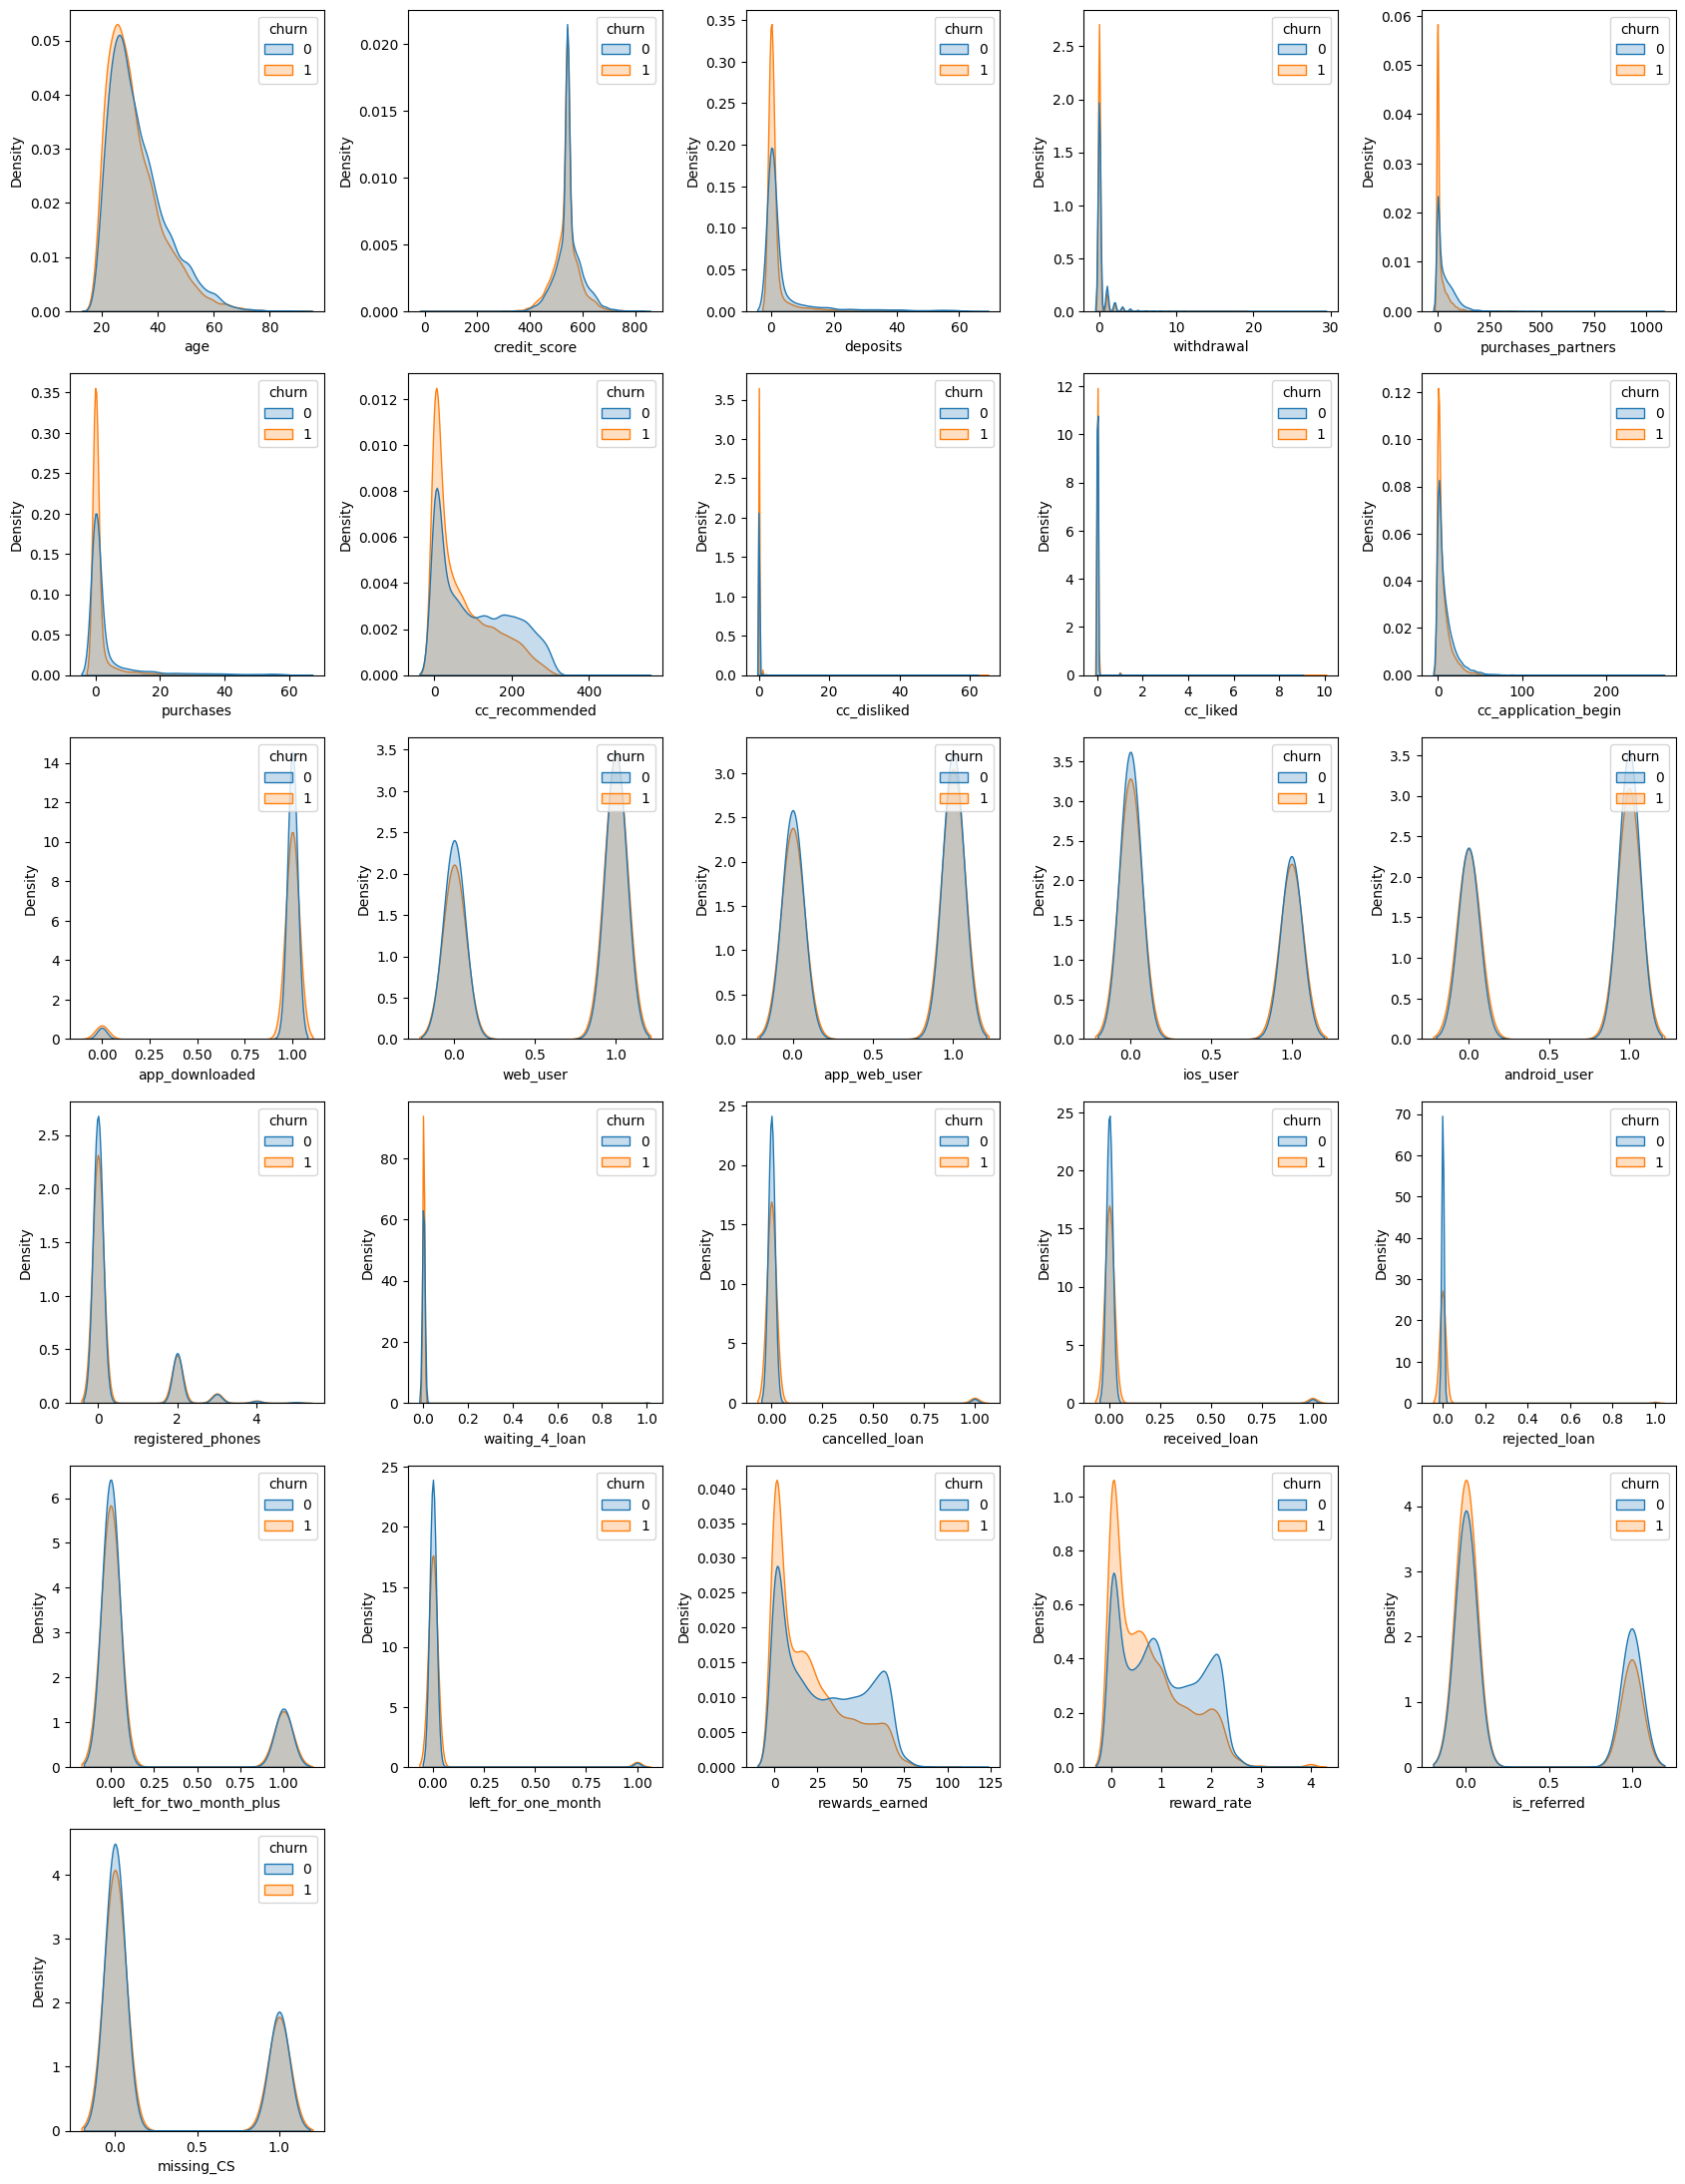

In [87]:
features = ['age', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones',  'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred',"missing_CS"]

plt.figure(figsize=(17, 22))

for i, feature in enumerate(features):  # Exclude 'churn' and 'churn_status' columns
    plt.subplot(6, 5, i + 1)  # Adjust the number of subplots based on the number of features
    sns.kdeplot(data=combined_data, x=feature, hue='churn', fill=True, common_norm=False)

plt.tight_layout()
plt.show()

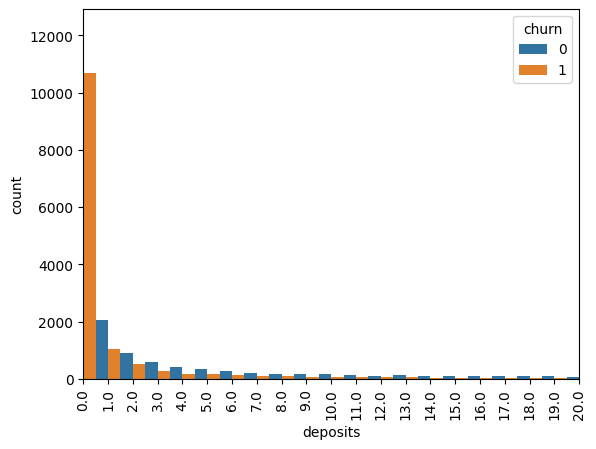

In [22]:
# Assuming combined_data is your DataFrame
sns.countplot(x=combined_data["deposits"], data=combined_data, hue='churn', width=1)

# Set x-axis limit to show values smaller than 20
plt.xlim(0, 20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

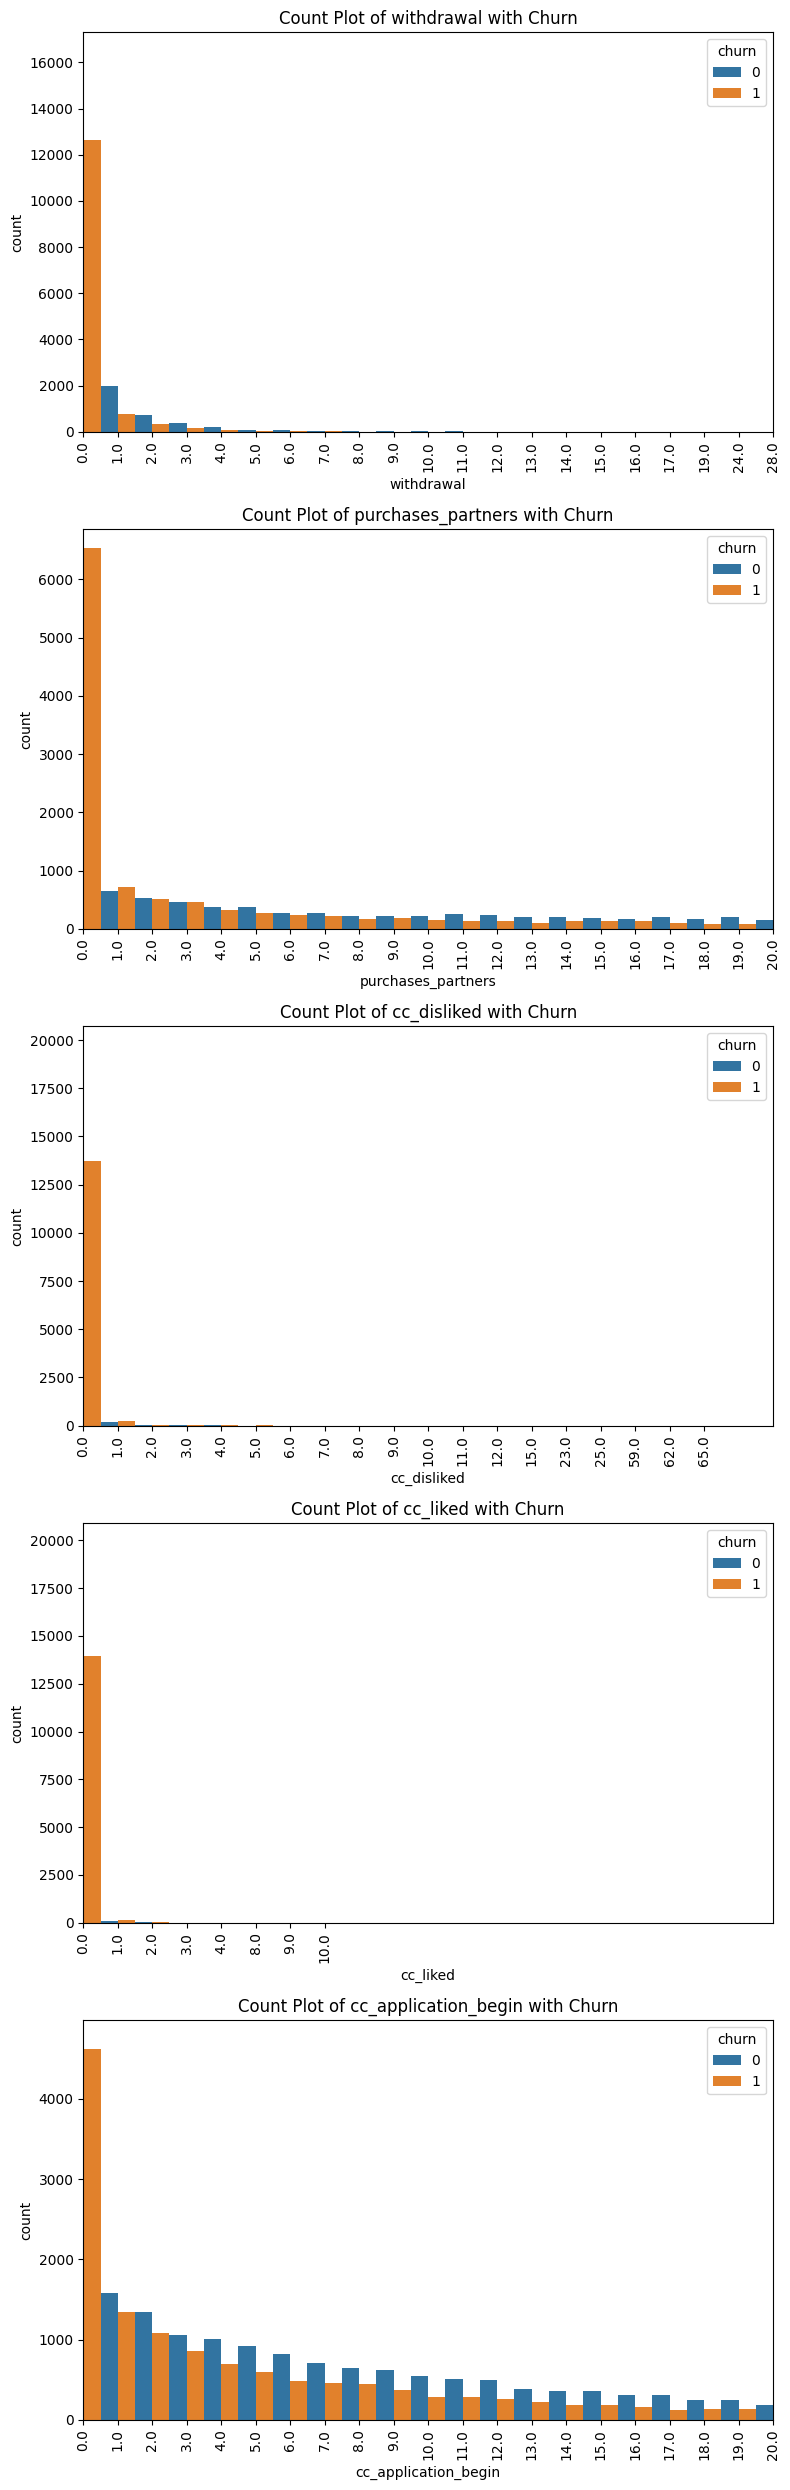

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_data is your DataFrame
columns_to_plot = ["withdrawal", "purchases_partners", "cc_disliked", "cc_liked", "cc_application_begin"]

# Create subplots based on the number of columns to plot
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 5 * len(columns_to_plot)))

# Create count plots for each specified column
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=combined_data[column], data=combined_data, hue='churn', width=1, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column} with Churn')
    axes[i].set_xlim(0, 20)  # Set x-axis limit to show values smaller than 20
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [90]:
# Assuming combined_data is your DataFrame with the specified columns
categorical_columns = ['app_downloaded', 'web_user', 'app_web_user', 'ios_user',
                        'android_user', 'registered_phones', 'waiting_4_loan',
                        'cancelled_loan', 'received_loan', 'rejected_loan',
                        'left_for_two_month_plus', 'left_for_one_month',
                        'is_referred', 'missing_CS']

# Convert specified columns to categorical
combined_data[categorical_columns] = combined_data[categorical_columns].astype('object')


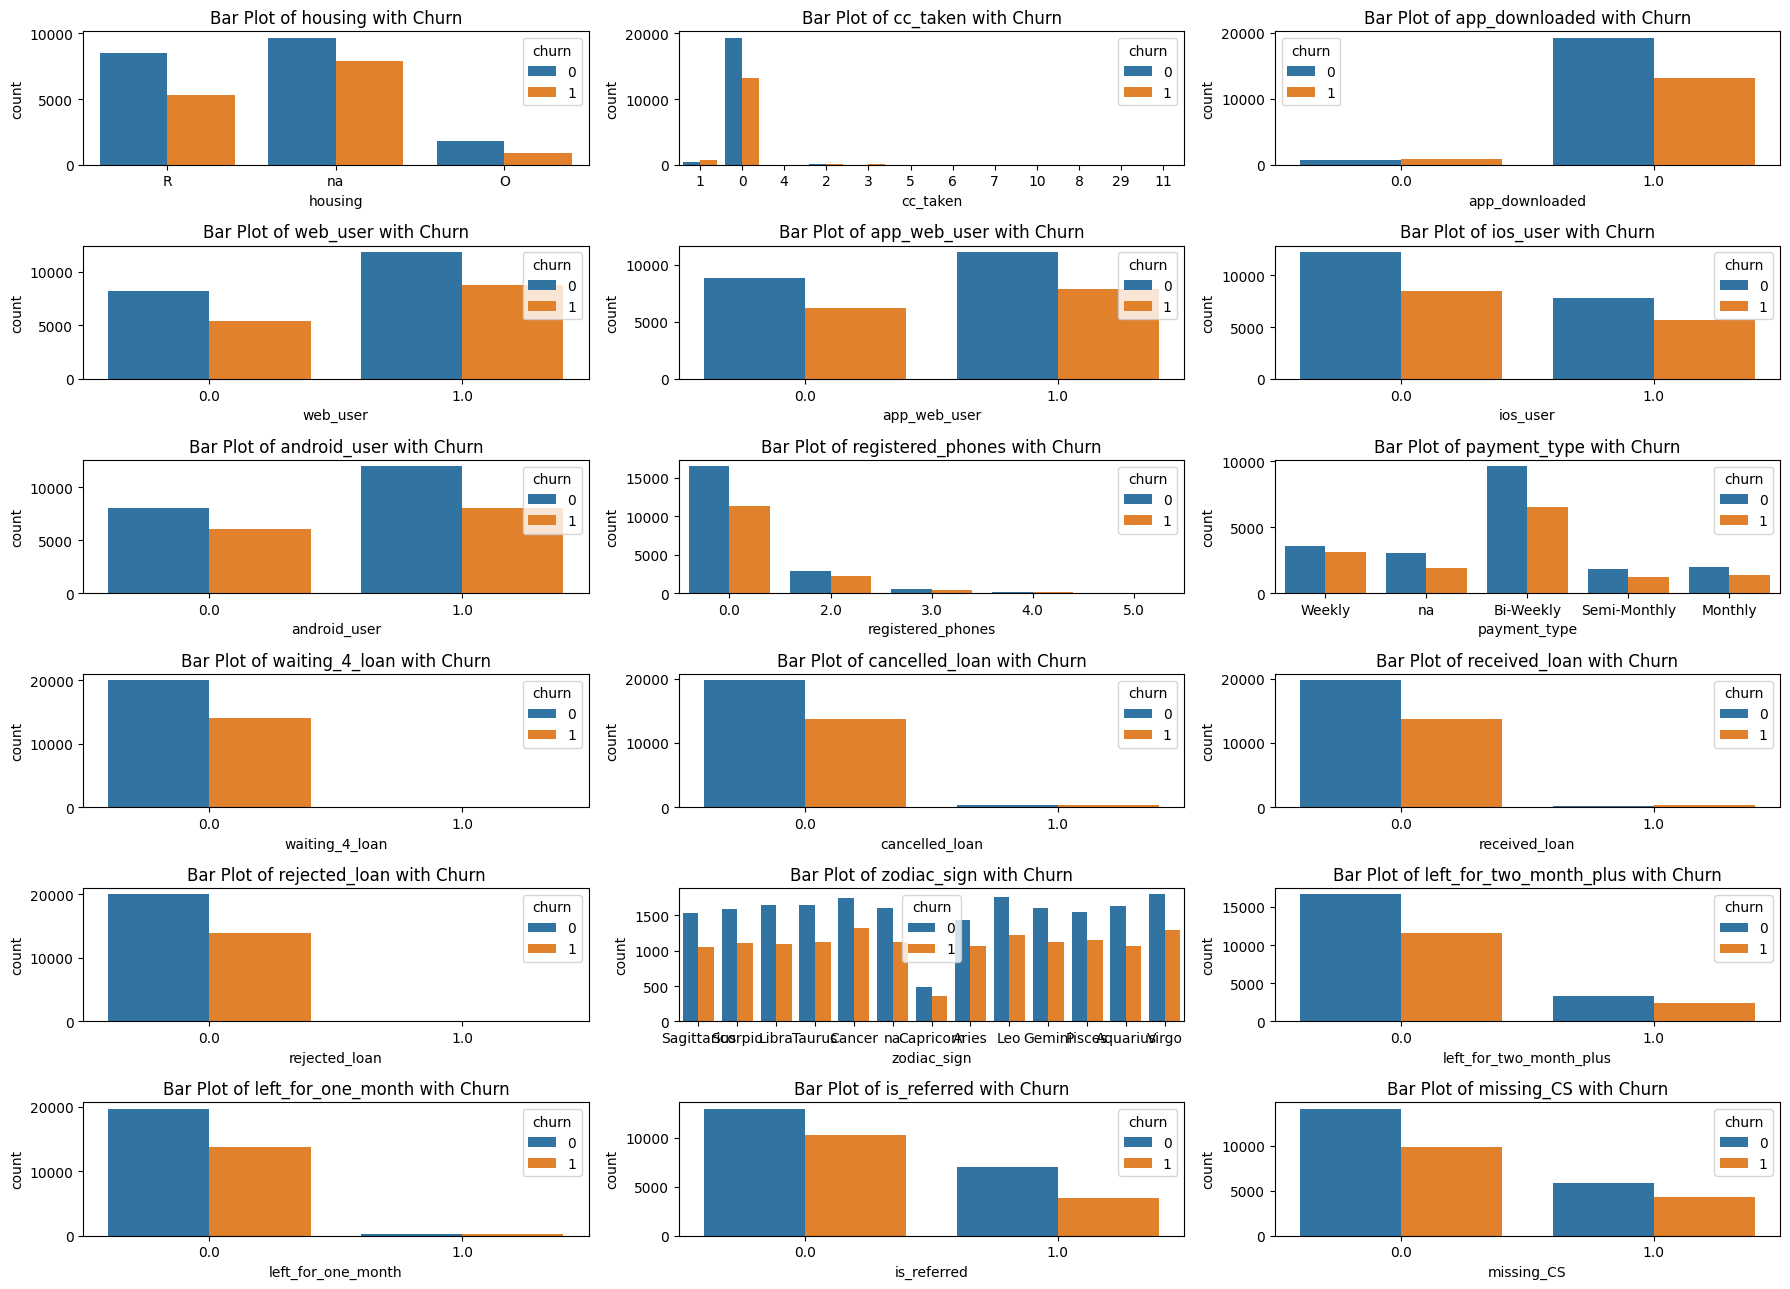

In [95]:
categorical_features = combined_data.select_dtypes(include='object')

# Set up the matplotlib figure
plt.figure(figsize=(18, 13))

# Create bar plots for each categorical feature with respect to churn
for i, feature in enumerate(categorical_features.columns):
    plt.subplot(6, 3, i + 1)  # Adjust the number of subplots based on the number of features
    sns.countplot(x=feature, hue='churn', data=combined_data)
    plt.title(f'Bar Plot of {feature} with Churn')

plt.tight_layout()
plt.show()

# Featuers engenreeing

remove the feats with super high corr or variance

In [98]:
feat_to_remove = ["cc_recommended", "reward_rate","zodiac_sign","waiting_4_loan", "rejected_loan","purchases", "ios_user" ,'user']

X_train = X_train.drop(feat_to_remove, axis = 1)
X_test = X_test.drop(feat_to_remove, axis = 1)

KeyError: "['cc_recommended', 'reward_rate', 'zodiac_sign', 'waiting_4_loan', 'rejected_loan', 'purchases', 'ios_user', 'user'] not found in axis"

In [99]:
feats = ["withdrawal", 'deposits',"cc_application_begin"]

for feat in feats:
  conditions = [
      (X_train[feat] == 0),
      (X_train[feat] == 1),
      (X_train[feat] > 1)
  ]

  choices = [0, 1, 3]
  X_train[feat] = np.select(conditions, choices, default=X_train[feat])

In [100]:
  feats = ["withdrawal", 'deposits',"cc_application_begin"]

for feat in feats:
    conditions = [
      (X_test[feat] == 0),
      (X_test[feat] == 1),
      (X_test[feat] > 1)
  ]

    choices = [0, 1, 3]
    X_test[feat] = np.select(conditions, choices, default=X_test[feat])

In [101]:
X_train["cc_disliked"] = X_train.apply(lambda x: x["cc_disliked"] == 1 if x["cc_disliked"] > 0 else x["cc_disliked"] == 0, axis = 1)
X_train["cc_liked"] = X_train.apply(lambda x: x["cc_liked"] == 1 if x["cc_liked"] > 0 else x["cc_liked"] == 0, axis = 1)

In [102]:
X_test["cc_disliked"] = X_test.apply(lambda x: x["cc_disliked"] == 1 if x["cc_disliked"] > 0 else x["cc_disliked"] == 0, axis = 1)
X_test["cc_liked"] = X_test.apply(lambda x: x["cc_liked"] == 1 if x["cc_liked"] > 0 else x["cc_liked"] == 0, axis = 1)

In [103]:
mean_encoding_map = combined_data.groupby('housing')['churn'].mean().to_dict()

# Map the mean encoding values back to the 'housing' column
X_train['housing'] = X_train['housing'].map(mean_encoding_map)
X_test['housing'] = X_test['housing'].map(mean_encoding_map)

In [104]:
X_train = pd.get_dummies(X_train, columns=["payment_type"])
X_test = pd.get_dummies(X_test, columns=["payment_type"])

In [105]:
X_train['cc_taken'] = X_train['cc_taken'].astype(float)
X_test['cc_taken'] = X_test['cc_taken'].astype(float)

In [106]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8536 entries, 18078 to 10762
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        8536 non-null   float64
 1   housing                    8536 non-null   float64
 2   credit_score               8536 non-null   float64
 3   deposits                   8536 non-null   int64  
 4   withdrawal                 8536 non-null   int64  
 5   purchases_partners         8536 non-null   int64  
 6   cc_taken                   8536 non-null   float64
 7   cc_disliked                8536 non-null   bool   
 8   cc_liked                   8536 non-null   bool   
 9   cc_application_begin       8536 non-null   float64
 10  app_downloaded             8536 non-null   int64  
 11  web_user                   8536 non-null   float64
 12  app_web_user               8536 non-null   float64
 13  android_user               8536 non-null   

In [73]:
X_train.to_csv('X_train.csv', index=False)

# To download the CSV file
from google.colab import files
files.download('X_train.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Model

In [81]:
# prompt: run RF and XGboost
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Perform cross-validation on the training set
cv_results = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')  # Adjust the number of folds as needed

# Print cross-validation results
print("Cross-Validation Results:")
print("Mean Accuracy:", cv_results.mean())
print("Standard Deviation:", cv_results.std())

# Fit the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model on the test set
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)

# Print the results
print("\nRandom Forest Accuracy on Test Set:", rf_accuracy)
print("Random Forest F1 Score on Test Set:", rf_f1_score)


Cross-Validation Results:
Mean Accuracy: 0.6756787872063515
Standard Deviation: 0.0033071162476658944

Random Forest Accuracy on Test Set: 0.6863870665417057
Random Forest F1 Score on Test Set: 0.5653515181035882


In [82]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Assuming X_train, y_train, X_test, and y_test are your training and test sets

# Create an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, random_state=1, enable_categorical=True)

# Perform cross-validation on the training set
cv_results = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Adjust the number of folds as needed

# Print cross-validation results
print("Cross-Validation Results:")
print("Mean Accuracy:", cv_results.mean())
print("Standard Deviation:", cv_results.std())

# Fit the model on the entire training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model on the test set
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions)

# Print the results
print("\nXGBoost Accuracy on Test Set:", xgb_accuracy)
print("XGBoost F1 Score on Test Set:", xgb_f1_score)

Cross-Validation Results:
Mean Accuracy: 0.7301913368376314
Standard Deviation: 0.006767224322013271

XGBoost Accuracy on Test Set: 0.7350046860356139
XGBoost F1 Score on Test Set: 0.6578947368421052


#Model Evaluations

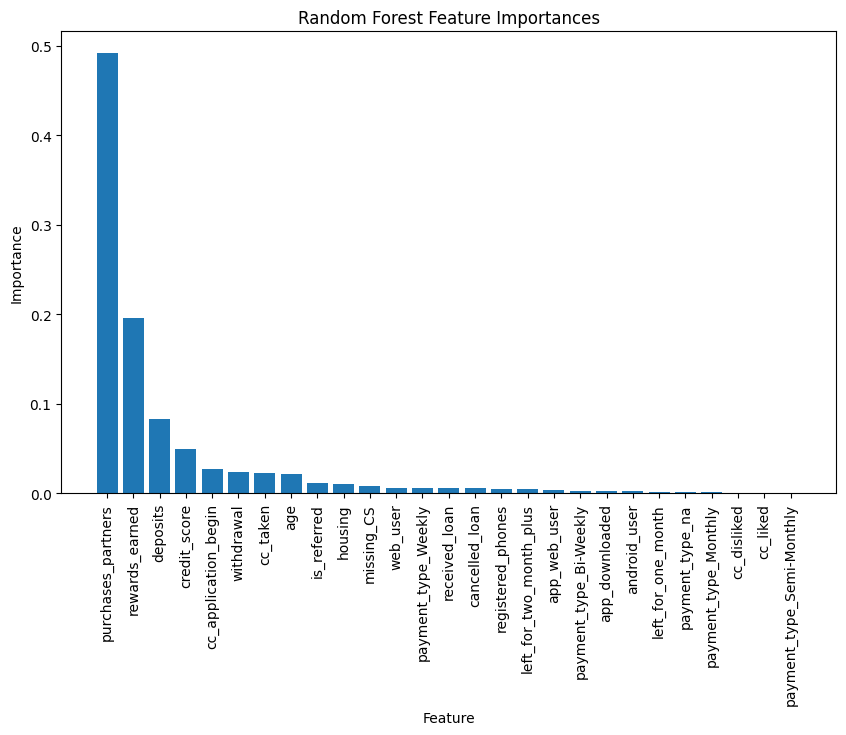

In [83]:
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [84]:
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.83      0.75      4989
           1       0.67      0.49      0.57      3547

    accuracy                           0.69      8536
   macro avg       0.68      0.66      0.66      8536
weighted avg       0.68      0.69      0.68      8536



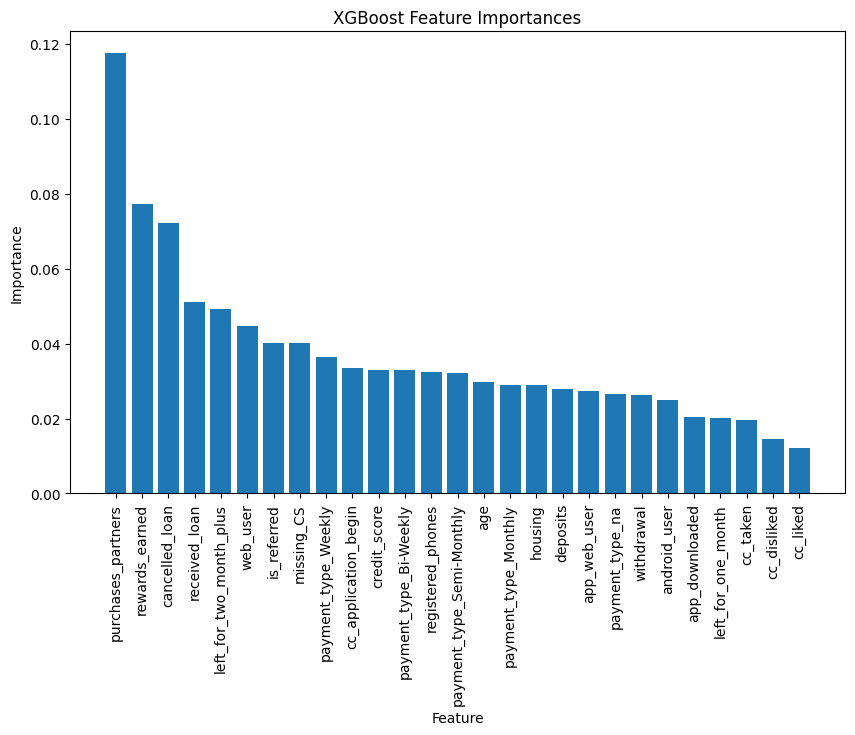

In [87]:
feature_importances = xgb_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importances")
plt.show()

In [85]:
print("Classification Report for XGB:")
print(classification_report(y_test, xgb_predictions))

Classification Report for XGB:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      4989
           1       0.71      0.61      0.66      3547

    accuracy                           0.74      8536
   macro avg       0.73      0.72      0.72      8536
weighted avg       0.73      0.74      0.73      8536



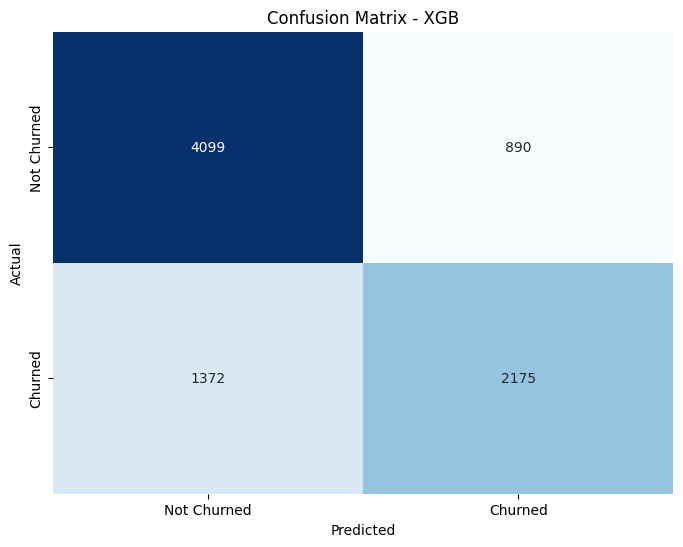

In [86]:
conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGB')
plt.show()

#improvments

remove unimportnent featuers

In [90]:
selected_features = feature_names[feature_importances >= 0.02]

# Subset the training and test sets based on selected features
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'housing', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'android_user', 'registered_phones',
       'cancelled_loan', 'received_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'rewards_earned', 'is_referred', 'missing_CS',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na'],
      dtype='object')


In [91]:
cv_results = cross_val_score(xgb_model, X_train_filtered, y_train, cv=5, scoring='accuracy')  # Adjust the number of folds as needed

# Print cross-validation results
print("Cross-Validation Results:")
print("Mean Accuracy:", cv_results.mean())
print("Standard Deviation:", cv_results.std())

# Fit the model on the entire training set
xgb_model.fit(X_train_filtered, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test_filtered)

# Evaluate the model on the test set
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions)

# Print the results
print("\nXGBoost Accuracy on Test Set:", xgb_accuracy)
print("XGBoost F1 Score on Test Set:", xgb_f1_score)

Cross-Validation Results:
Mean Accuracy: 0.7294589979190279
Standard Deviation: 0.003300979342959305

XGBoost Accuracy on Test Set: 0.7360590440487348
XGBoost F1 Score on Test Set: 0.6588947766843302


search for optimal parameters

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Create an XGBoost model
xgb_model = XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Define the scoring metric (you can use different metrics based on your task)
scorer = make_scorer(f1_score)

# Create the grid search object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # Adjust the number of folds as needed
    n_jobs=-1  # Use -1 for parallel processing
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best F1 Score: 0.7510094874898599


In [108]:
xgb_model = XGBClassifier(n_estimators=300, max_depth=7, colsample_bytree = 1.0, gamma= 0.2, learning_rate= 0.2, subsample = 0.8 ,random_state=1, enable_categorical=True)

# Perform cross-validation on the training set
cv_results = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Adjust the number of folds as needed

# Print cross-validation results
print("Cross-Validation Results:")
print("Mean Accuracy:", cv_results.mean())
print("Standard Deviation:", cv_results.std())

# Fit the model on the entire training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model on the test set
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1_score = f1_score(y_test, xgb_predictions)

# Print the results
print("\nXGBoost Accuracy on Test Set:", xgb_accuracy)
print("XGBoost F1 Score on Test Set:", xgb_f1_score)

Cross-Validation Results:
Mean Accuracy: 0.800814497452266
Standard Deviation: 0.005945387476782392

XGBoost Accuracy on Test Set: 0.8134957825679475
XGBoost F1 Score on Test Set: 0.7678623505395158


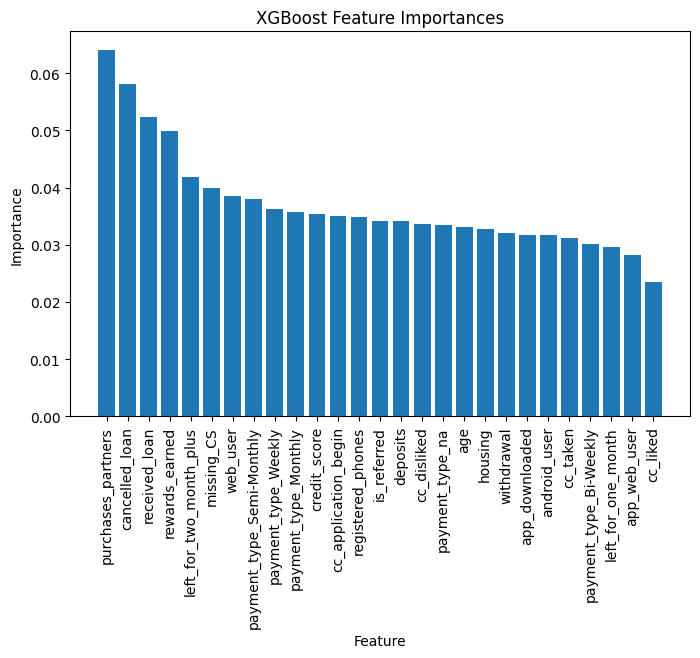

In [110]:
feature_importances = xgb_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importances")
plt.show()

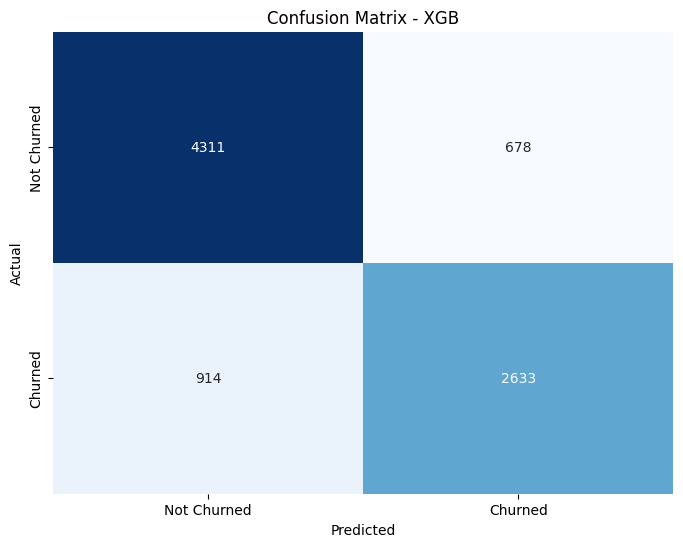

In [111]:
conf_matrix = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGB')
plt.show()

#ensambling

In [112]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Create XGBoost model
xgb_model = XGBClassifier(n_estimators=300, max_depth=7, colsample_bytree = 1.0, gamma= 0.2, learning_rate= 0.2, subsample = 0.8 ,random_state=1, enable_categorical=True)


# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Create an ensemble with weights
ensemble = VotingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model)],
    voting='soft',  # Use 'soft' voting for probability-based weighting
    weights=[0.7, 0.3]  # Adjust weights as needed
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
ensemble_predictions_cv = cross_val_predict(ensemble, X_train, y_train, cv=cv, method='predict_proba')

# Combine predictions from cross-validation to get ensemble weights
ensemble_weights = np.mean(ensemble_predictions_cv, axis=0)

# Fit the ensemble on the training set
ensemble.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = ensemble.predict(X_test)

# Evaluate the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

# Print the accuracy of the ensemble
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.8078725398313027
